In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train_ctrUa4K.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
#Check missing values 
df.isna().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#Replace Missing Values
target = df.Loan_Status
catcols = ['Gender','Married','Education','Self_Employed','Property_Area']
numcols = ['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [6]:
#Replace Y and N with 1/0
target.replace({"Y":1,"N":0},inplace=True)

In [7]:
#Checking column by column about missing values etc. Starting with Gender
for i in catcols:
    print("Unique classes in {} column : {}\n".format(i, df[i].unique()))

Unique classes in Gender column : ['Male' 'Female' nan]

Unique classes in Married column : ['No' 'Yes' nan]

Unique classes in Education column : ['Graduate' 'Not Graduate']

Unique classes in Self_Employed column : ['No' 'Yes' nan]

Unique classes in Property_Area column : ['Urban' 'Rural' 'Semiurban']



In [8]:
#Replacing Gender, Self_Employed columns with respective modes
print(df.Gender.value_counts())
df.Gender.fillna("Male",inplace=True)

print(df.Self_Employed.value_counts())
df.Self_Employed.fillna("No",inplace=True)

print(df.Married.value_counts())
df.Married.fillna("Yes",inplace=True)


Male      489
Female    112
Name: Gender, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64


In [9]:
df.Dependents.replace("3+","3",inplace=True)
print(df.Dependents.value_counts())
df.Dependents.fillna(0,inplace=True)


#Convert dependents into int
df.Dependents = df.Dependents.astype("int64")

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64


In [10]:
# Fill empty cells with column level mean
df['ApplicantIncome']=df['ApplicantIncome'].fillna(df.ApplicantIncome.mean()).astype("float64")
df['CoapplicantIncome']=df['CoapplicantIncome'].fillna(df.CoapplicantIncome.mean()).astype("float64")
df['LoanAmount']=df['LoanAmount'].fillna(df.LoanAmount.mean()).astype("float64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.mean()).astype("float64")
df['Credit_History']=df['Credit_History'].fillna(0).astype("float64")


In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [12]:
#Check missing values 
df.isna().sum(axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

1    422
0    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

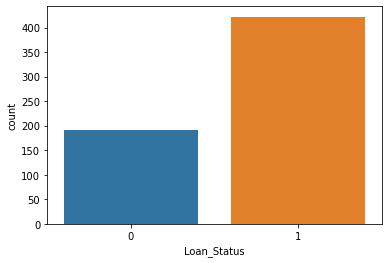

In [13]:
print(target.value_counts())
sns.countplot(x=target)

As seen above there is a class imbalance here and we also have a majority of the applications got approved. Thus the benchmark to beat will be 68.7%. Let us visualise the given data and see if we can understand the data a bit more 

<AxesSubplot:>

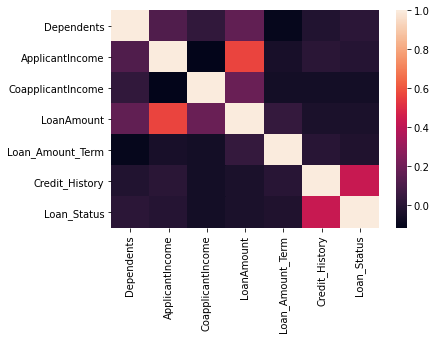

In [14]:
sns.heatmap(df.corr())

Above correlation plot shows that th variables are not strongly correlated. Highest correlation is observed between LoanAmount and ApplicantIncome which is expected. Another higher level of correlation is obeserved between Credit History and Loan_Status. It is also expected as people having credit history are easier to assess for banks

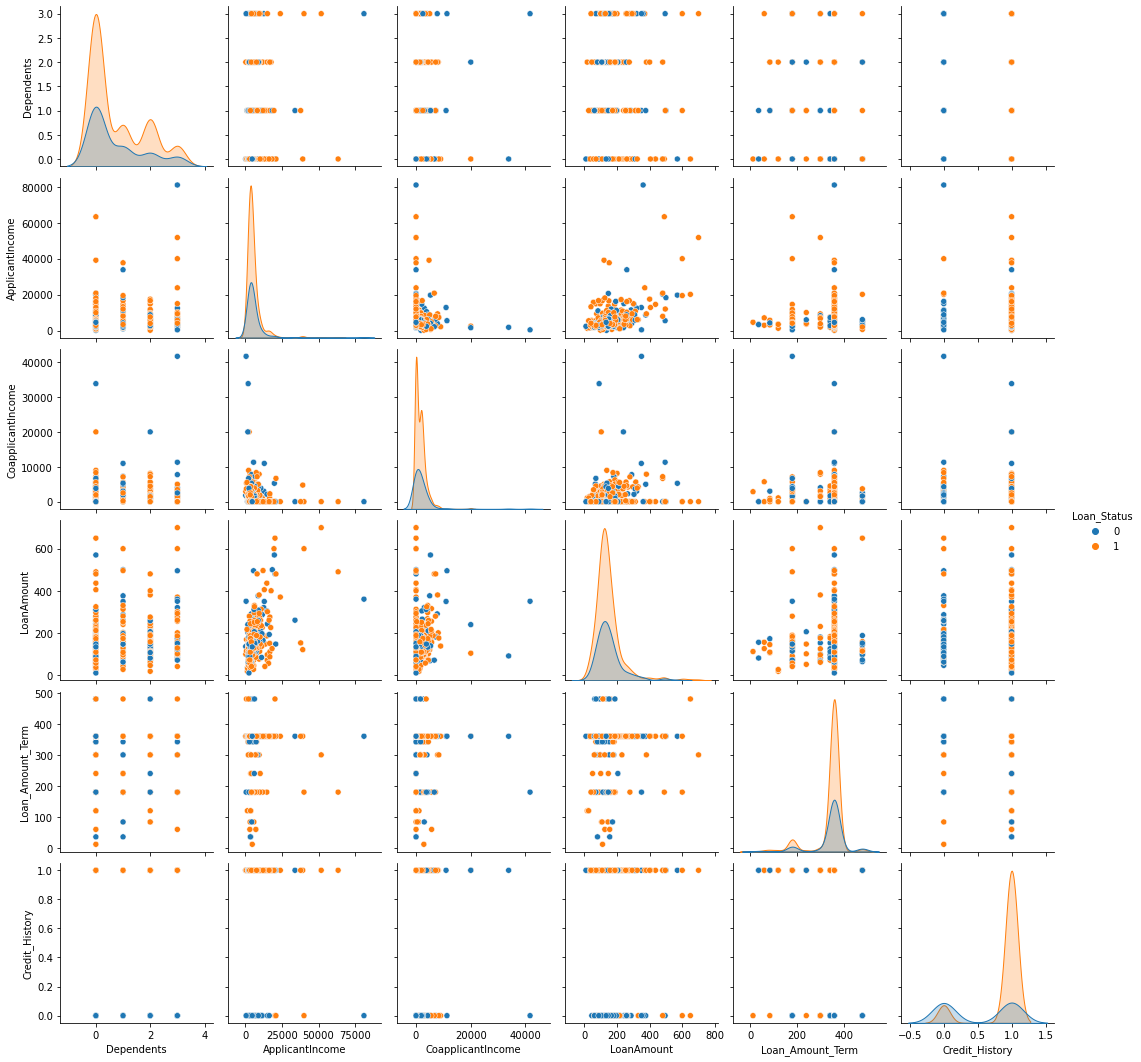

In [15]:
sns.pairplot(df,hue="Loan_Status")

The above plot shows some interesting insights : 
<ol> 
    <li>Having a credit History almost always guarantees a loan application getting accepted </li>
    <li> Loan amount term of aroudn 400 days is most common </li>
    <li> Number of dependents doesn't seem to have a material impact on the application </li>
    <li> LoanAmount vs ApplicantIncome seem to have a linear-ish relationship </li>
    
  </ol>

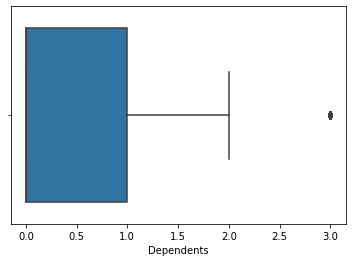

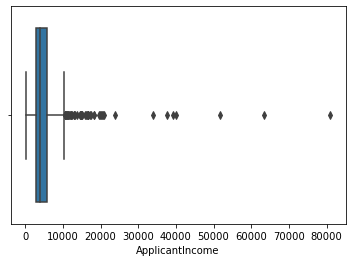

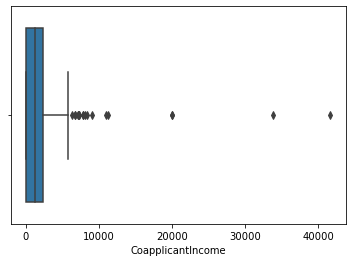

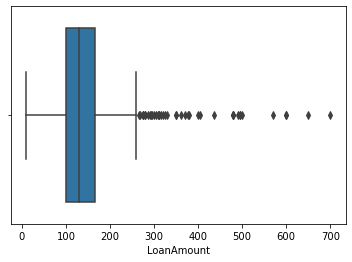

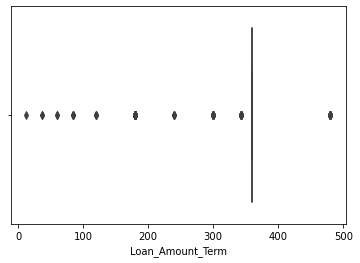

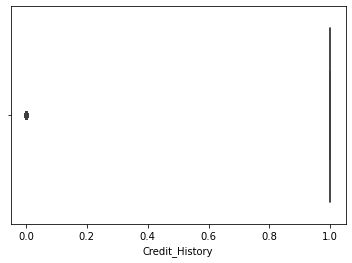

In [16]:
for i in numcols:
    plt.figure()
    sns.boxplot(x=df[i])

As seen above, the `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount` fields have a lot of outliers. `Loan_Amount_Term` has discrete entries `360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.` and thus we don't need to worry about outliers in this field.


Now, in this particular problem we are concerned with the Income levels and we know that high earning people also apply for loans, thus it does not make sense to exclude them. Let's see if a logarithmic transformation decreases the skew

<AxesSubplot:xlabel='ApplicantIncome'>

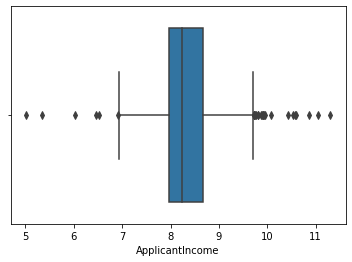

In [17]:
sns.boxplot(x=np.log(df.ApplicantIncome))

Indeed logarithmic transformation decreases the skew. Now,  investigate how do the categorical variables affect the `Loan_Status`

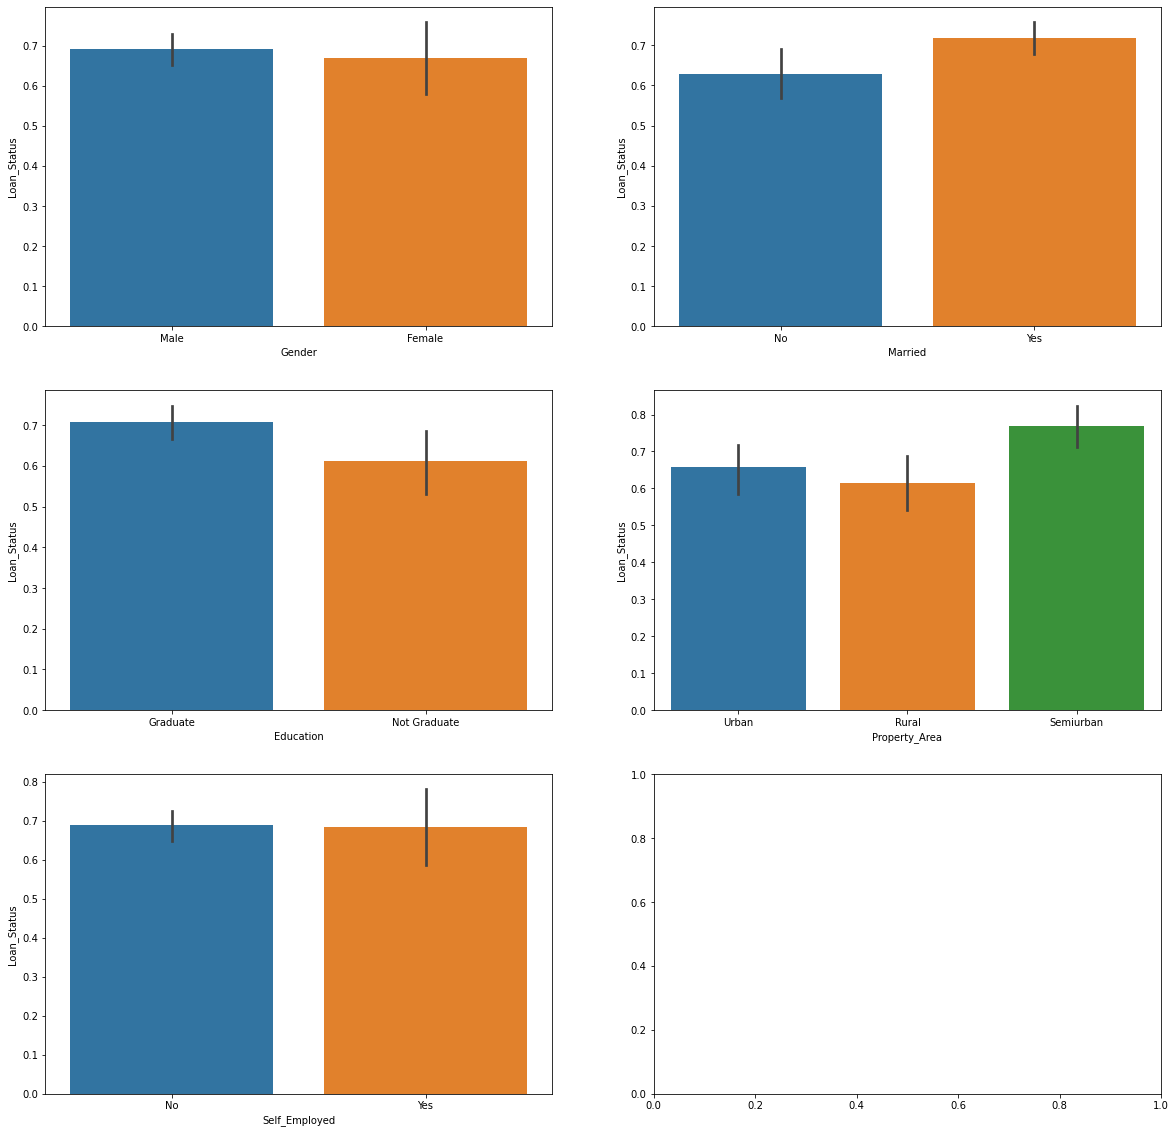

In [103]:
fig, axes = plt.subplots(3,2,figsize=(20, 20))
sns.barplot(ax=axes[0,0],y='Loan_Status',x="Gender",data=df)
sns.barplot(ax=axes[0,1],y='Loan_Status',x="Married",data=df)
sns.barplot(ax=axes[1,0],y='Loan_Status',x="Education",data=df)
sns.barplot(ax=axes[1,1],y='Loan_Status',x="Property_Area",data=df)
sns.barplot(ax=axes[2,0],y='Loan_Status',x="Self_Employed",data=df)

plt.show()

In [55]:

print(df.Married.value_counts())

print(df.Education.value_counts())

Yes    401
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


As seen above, <ol>
    <li> Being Male or Female has minimal impact on Loan application </li>
    <li> Being married improves getting chances of loan getting approved by ~7-8%, this is significant provided we have almost twice as many rows with Married = "Y" </li>
    <li> Similar result is observed for Education </li>
    <li> Semiurban applications have most approval rates </li>
    </ol>
   
I'd like to dig a little deeper in `Property_Area` field and see how loan Amounts change with `Property_Area`

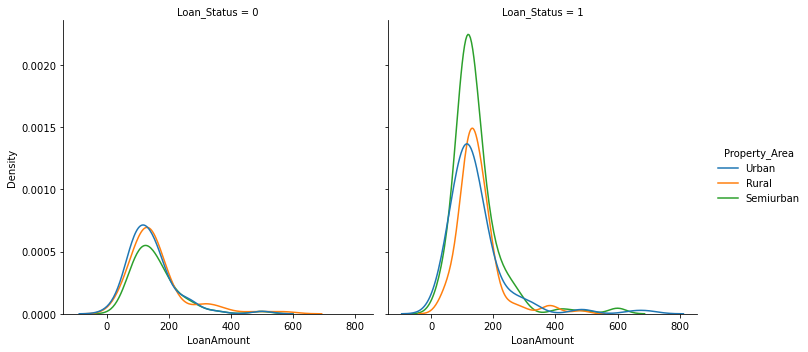

In [81]:
sns.displot(x='LoanAmount', col="Loan_Status",hue='Property_Area',data=df,kind="kde")

It is interesting to note that the `LoanAmount` distribution for all 3 segments is quite similar. I'd have expected Rural loans to be of smaller size while urbane loans to be of greater size. Hmmmmmmmmmmmmm....

Let us explore if LoanAmount distribution is changing for other Categorical fields

So married folks on average apply for higher Loan Amount


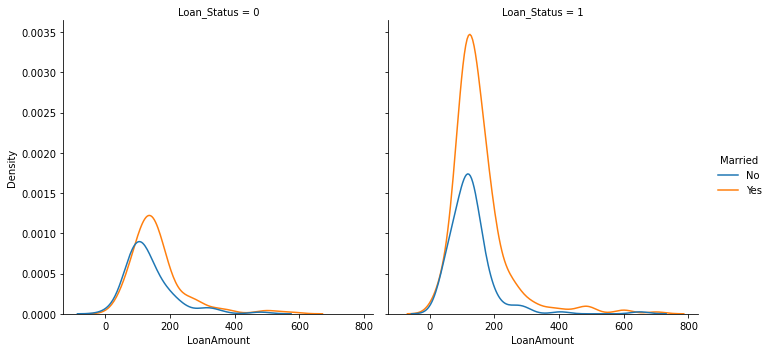

In [98]:
sns.displot(x='LoanAmount', col="Loan_Status",hue='Married',data=df,kind="kde")
print("So married folks on average apply for higher Loan Amount")

Male applicants outnumber Female applicants (No effect on approval rates though as seen earlier)


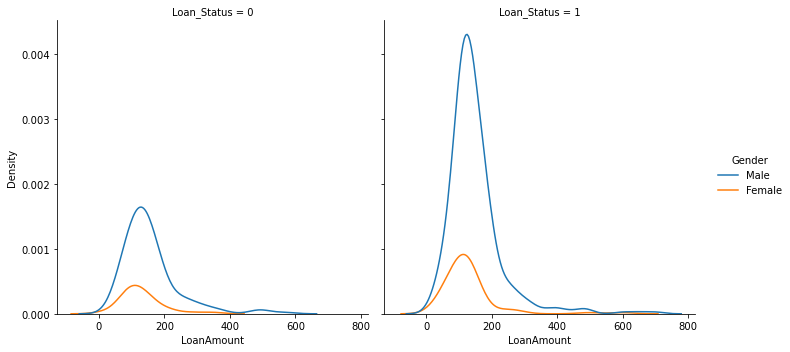

In [94]:
sns.displot(x='LoanAmount', col="Loan_Status",hue='Gender',data=df,kind="kde")
print("Male applicants outnumber Female applicants (No effect on approval rates though as seen earlier)")

Confirms that Higher education folks are applying for more loans, on both side of the mean (broader tails)


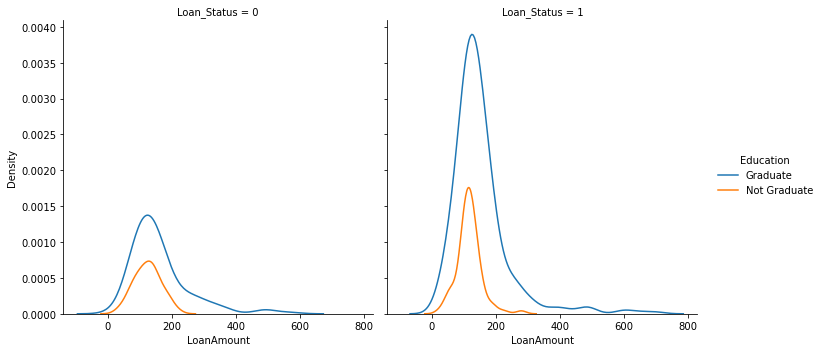

In [96]:
sns.displot(x='LoanAmount', col="Loan_Status",hue='Education',data=df,kind="kde")
print("Confirms that Higher education folks are applying for more loans, on both side of the mean (broader tails)")

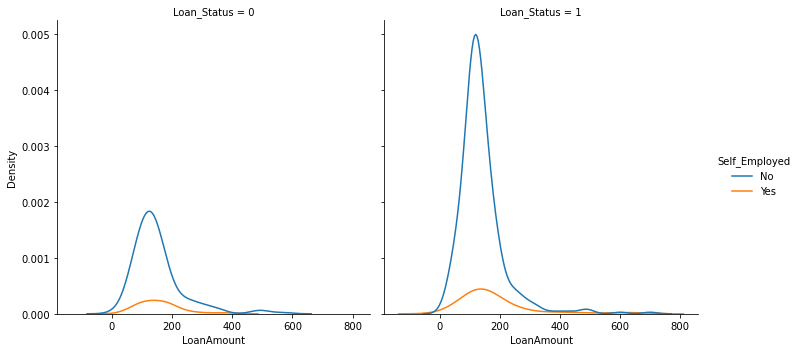

In [100]:
sns.displot(x='LoanAmount', col="Loan_Status",hue='Self_Employed',data=df,kind="kde")


Now it's time to move on to the fancy stuff, modelling. Before we do that, I'll convert categorical features like `Gender`, `Education`, `Property_Area` and `Self_Employed` into OHE. Convert `ApplicantIncome` and `CoapplicantIncome` to logarithmic scale

In [105]:

#catcols = ['Gender','Married','Education','Self_Employed','Property_Area